In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [80]:
df = pd.read_csv("C:\\Users\\sumit\\Desktop\\LLM\Machine Learning\\Project2\\hr_comma_sep\\HR_comma_sep.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sumit\AppData\Local\Temp\ipykernel_18024\962303032.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\\Users\\sumit\\Desktop\\LLM\Machine Learning\\Project2\\hr_comma_sep\\HR_comma_sep.csv")


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [81]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [83]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

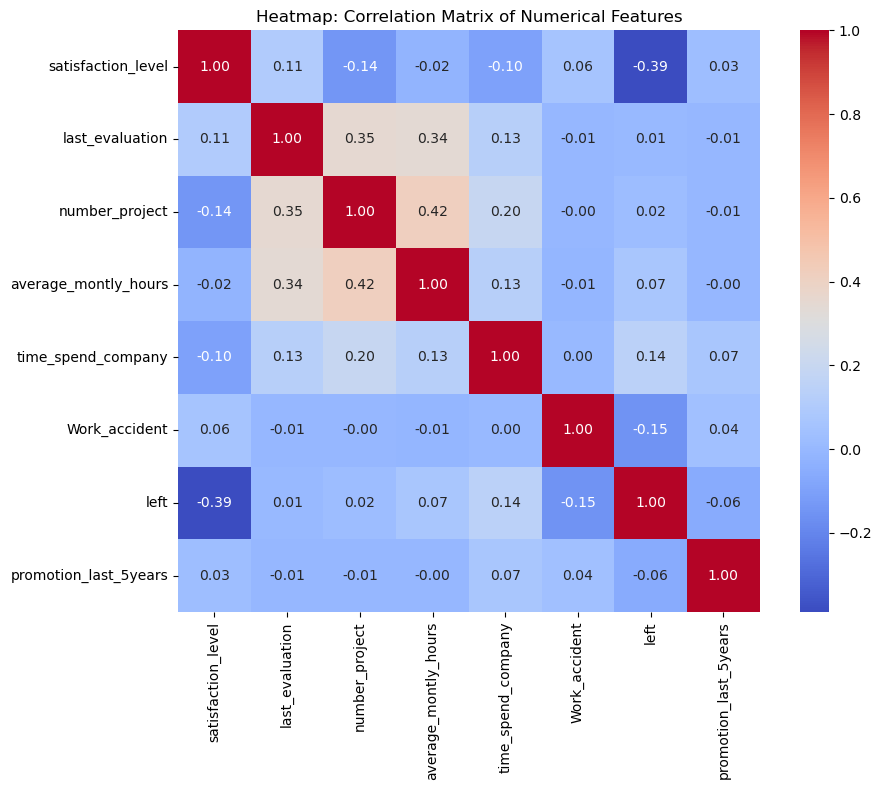

In [84]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Heatmap: Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

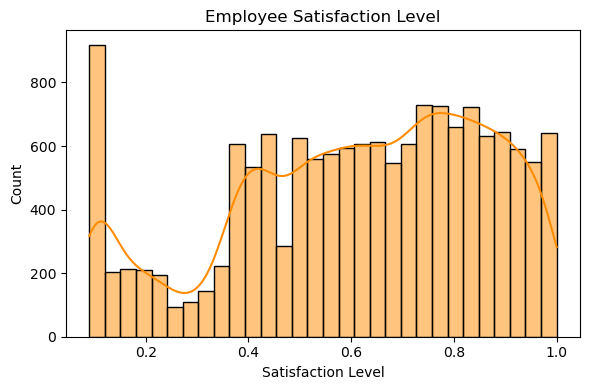

In [85]:
plt.figure(figsize=(6,4))
sns.histplot(df["satisfaction_level"], kde=True, bins=30, color="darkorange")
plt.title("Employee Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.tight_layout()
plt.show()      

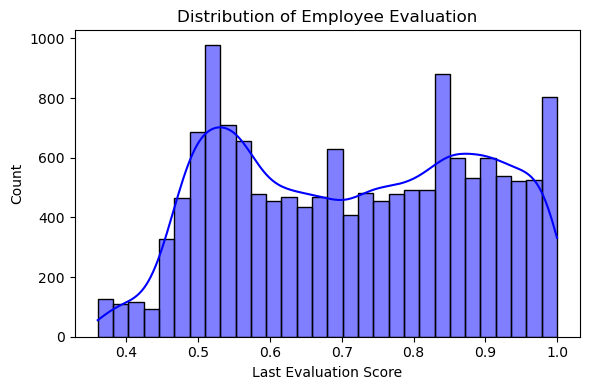

In [86]:
plt.figure(figsize=(6,4))
sns.histplot(df["last_evaluation"], kde=True, bins=30, color="blue")
plt.title("Distribution of Employee Evaluation")
plt.xlabel("Last Evaluation Score")
plt.tight_layout()
plt.show()

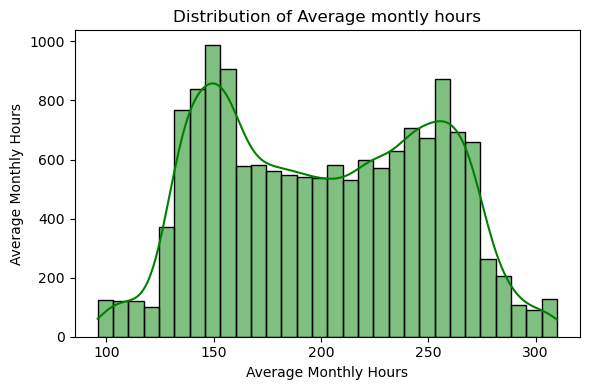

In [87]:
plt.figure(figsize=(6,4))
sns.histplot(df["average_montly_hours"], kde=True, bins=30, color="green")
plt.title("Distribution of Average montly hours")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Average Monthly Hours")
plt.tight_layout()
plt.show()

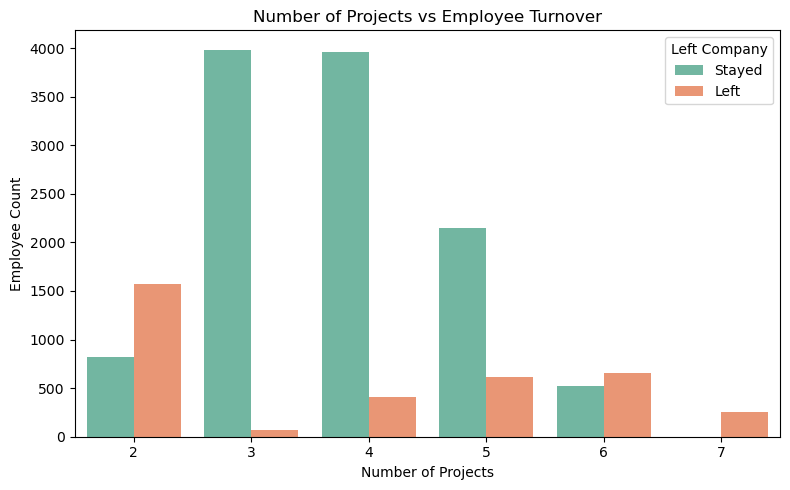

In [88]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="number_project", hue="left", palette="Set2")
plt.title("Number of Projects vs Employee Turnover")
plt.xlabel("Number of Projects")
plt.ylabel("Employee Count")
plt.legend(title="Left Company", labels=["Stayed", "Left"])
plt.tight_layout()
plt.show()

In [89]:
#Step 3: K-means clustering for employees who left
# 3.1 Select relevant columns and filter where employee left
left_df = df[df["left"] == 1][["satisfaction_level", "last_evaluation"]]

In [90]:
scaler = StandardScaler()

In [91]:
left_scaler = scaler.fit_transform(left_df)

In [92]:
kmeans = KMeans(n_clusters=3, random_state=123)
clusters = kmeans.fit_predict(left_scaler)
left_df["Clusters"]= clusters

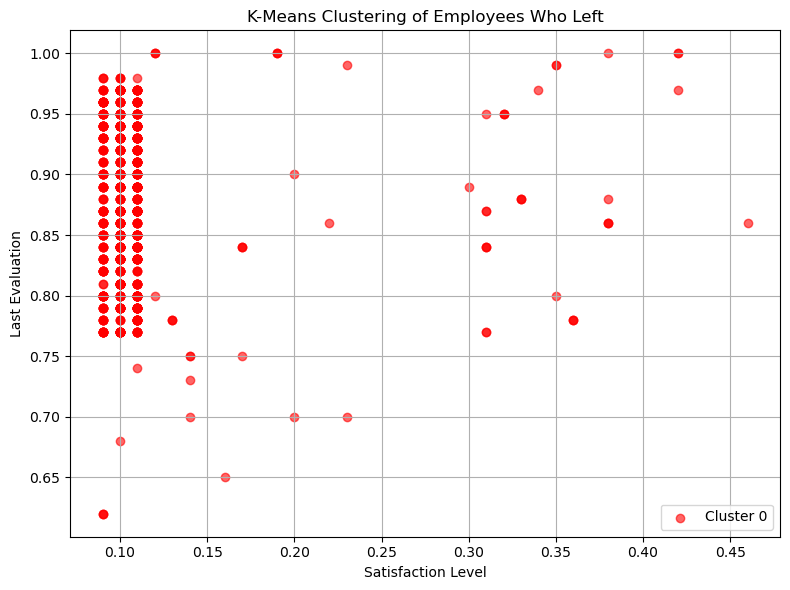

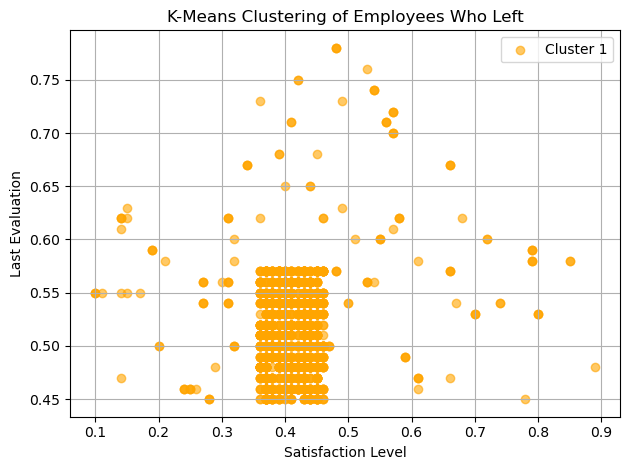

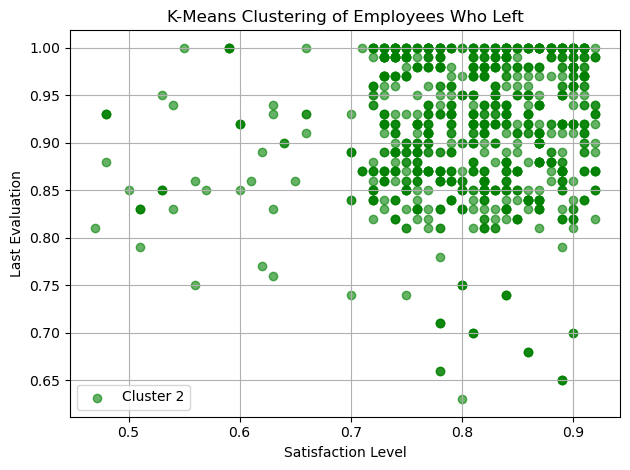

In [93]:
# 3.3 Plot clusters
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'green']
for i in range(3):
    clusters_data = left_df[left_df["Clusters"]== i]
    plt.scatter(clusters_data["satisfaction_level"], clusters_data["last_evaluation"], label=f"Cluster {i}", alpha=0.6, color=colors[i])
    plt.title("K-Means Clustering of Employees Who Left")
    plt.xlabel("Satisfaction Level")
    plt.ylabel("Last Evaluation")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

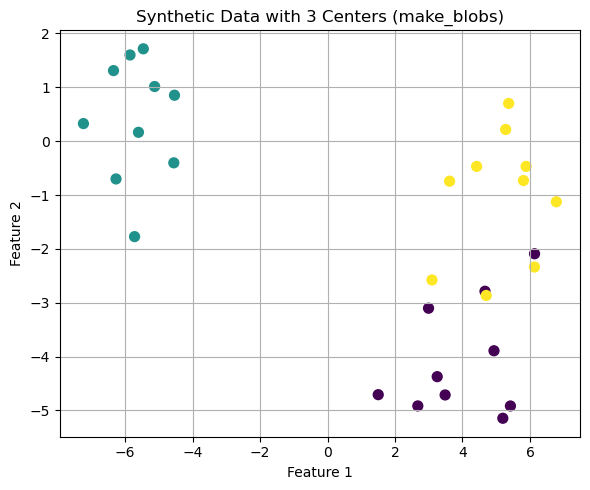

In [94]:
# Additional: Generate synthetic dataset using make_blobs
x_blob, y_blob = make_blobs(centers=3, n_samples=30, random_state=123)

# Plot synthetic blob data
plt.figure(figsize=(6, 5))
plt.scatter(x_blob[:, 0], x_blob[:, 1], c=y_blob, cmap='viridis', s=50)
plt.title("Synthetic Data with 3 Centers (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
## Step 4.1 Pre-process the data by converting categorical columns to numerical columns
X = df.drop("left", axis=1)
Y = df["left"]

In [96]:
# Separate categorical and numeric columns
categorical_cols = X.select_dtypes(include="object").columns
numeric_cols = X.select_dtypes(exclude="object").columns

In [97]:
## Encode categorical columns
X_cat = pd.get_dummies(X[categorical_cols], drop_first=True)
X_num = X[numeric_cols]

In [98]:
# Combine all features
X_processed = pd.concat([X_cat, X_num], axis=1)

In [99]:
# Step 4.2 – Stratified Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, stratify=Y, random_state=123)

In [100]:
# Step 4.3 – Apply SMOTE
smote = SMOTE(random_state=123)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [101]:
# Print class distribution before and after SMOTE
print("Before SMOTE:\n", Y_train.value_counts())
print("\nAfter SMOTE:\n",Y_train_smote.value_counts())

Before SMOTE:
 left
0    9142
1    2857
Name: count, dtype: int64

After SMOTE:
 left
0    9142
1    9142
Name: count, dtype: int64


In [102]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=123),
     "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=123),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=100)
}    

In [103]:
# 5.1 Train and evaluate each model using 5-fold cross-validation
for name, model in models.items():
    print(f"\n Training and evaluating: {name}") 



 Training and evaluating: Logistic Regression

 Training and evaluating: Random Forest Classifier

 Training and evaluating: Gradient Boosting Classifier


In [104]:
Y_pred = cross_val_predict(model, X_train, Y_train, cv=5)
 # Print classification report
print(classification_report(Y_train,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9142
           1       0.97      0.93      0.95      2857

    accuracy                           0.98     11999
   macro avg       0.97      0.96      0.97     11999
weighted avg       0.98      0.98      0.98     11999



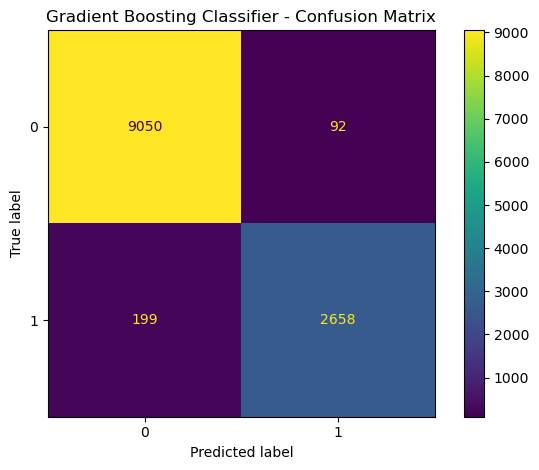

In [105]:
 # Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_train,Y_pred)
plt.title(f"{name} - Confusion Matrix")
plt.tight_layout()
plt.show()

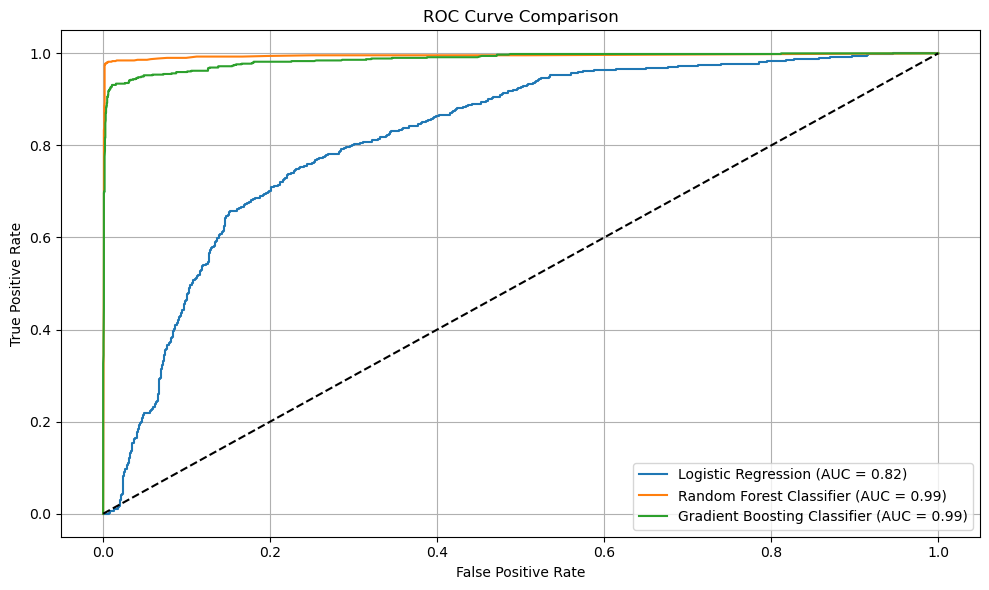

In [106]:
roc_scores = {}
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_proba)
    roc_auc = auc(fpr, tpr)
    roc_scores[name] = roc_auc
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

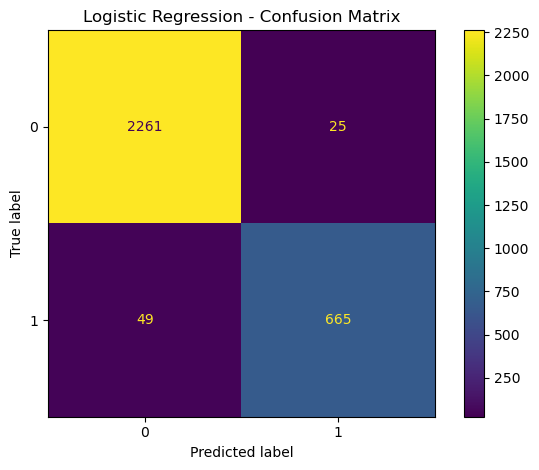

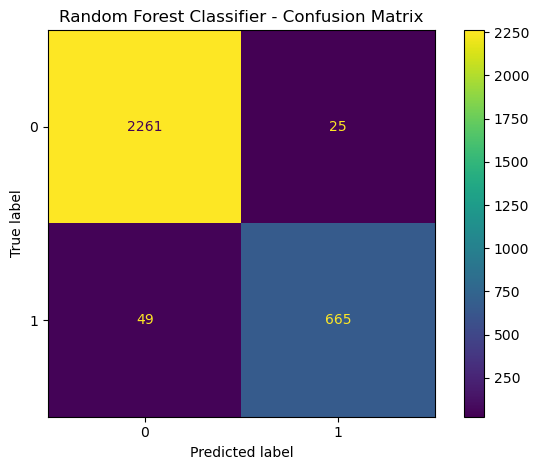

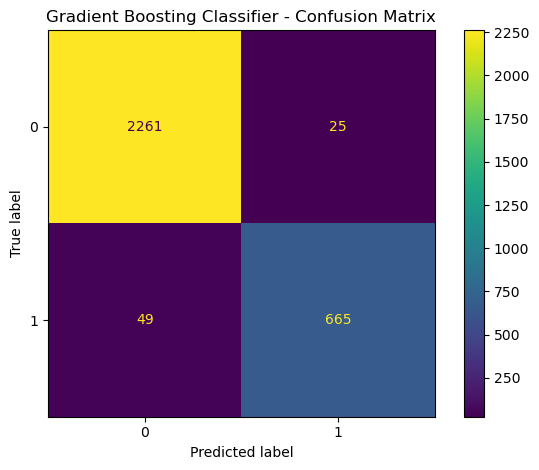

In [107]:
# 6.2 Confusion Matrices
for name, modle in models.items():
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()
    

In [108]:
# Step 7.1: Choose the best model (based on highest AUC)
best_model_name = max(roc_scores, key=roc_scores.get)
print(f"\n Best model is: {best_model_name}")
print (f"\n AUC : {roc_scores[best_model_name]}")
best_model = models[best_model_name]
print(f"\n Best model is: {best_model}")


 Best model is: Random Forest Classifier

 AUC : 0.9949019852910543

 Best model is: RandomForestClassifier(random_state=123)


In [109]:
# Predict probabilities
y_proba_test = best_model.predict_proba(X_test)[:, 1]
print(f"\n Proba_test: {y_proba_test}")


 Proba_test: [0.   0.49 0.03 ... 0.01 0.02 1.  ]


In [110]:
# Step 7.2: Categorize based on probability
risk_category = pd.cut(
    y_proba_test,
    bins=[0, 0.2, 0.6, 0.9, 1],
    labels=["Safe Zone (Green)", "Low-Risk Zone (Yellow)", "Medium-Risk Zone (Orange)", "High-Risk Zone (Red)"]
)

In [111]:
# Create a DataFrame to inspect predictions
employee_risk_df = X_test.copy()
employee_risk_df["Turnover_Probability"] = y_proba_test
employee_risk_df["Risk_Zone"] = risk_category
print(employee_risk_df[["Turnover_Probability", "Risk_Zone"]].head(10))

       Turnover_Probability               Risk_Zone
10627                  0.00                     NaN
2703                   0.49  Low-Risk Zone (Yellow)
6059                   0.03       Safe Zone (Green)
3258                   0.00                     NaN
4565                   0.00                     NaN
4991                   0.00                     NaN
13976                  0.01       Safe Zone (Green)
9427                   0.00                     NaN
7173                   0.01       Safe Zone (Green)
13412                  0.00                     NaN


In [112]:
# Count of each zone
zone_counts = employee_risk_df["Risk_Zone"].value_counts()
print("\n Employee Count by Risk Zone:\n", zone_counts)


 Employee Count by Risk Zone:
 Risk_Zone
Safe Zone (Green)            1119
High-Risk Zone (Red)          627
Medium-Risk Zone (Orange)      71
Low-Risk Zone (Yellow)         50
Name: count, dtype: int64


In [113]:
# Step 7.3: Retention Strategy Suggestions
print("\n Retention Strategies by Zone:")
print("""
1.   Safe Zone (Green) (< 20%):
   - Continue current engagement efforts.
   - Provide growth opportunities to maintain satisfaction.

2.  Low-Risk Zone (20%–60%):
   - Conduct regular 1-on-1s to monitor engagement.
   - Offer flexible work arrangements or mentorship.

3.   Medium-Risk Zone (60%–90%):
   - Identify workload issues or stagnation.
   - Create personalized development plans.

4.   High-Risk Zone (> 90%):
   - Immediate HR intervention recommended.
   - Consider role redesign, compensation review, or team transfer.
""")


 Retention Strategies by Zone:

1.   Safe Zone (Green) (< 20%):
   - Continue current engagement efforts.
   - Provide growth opportunities to maintain satisfaction.

2.  Low-Risk Zone (20%–60%):
   - Conduct regular 1-on-1s to monitor engagement.
   - Offer flexible work arrangements or mentorship.

3.   Medium-Risk Zone (60%–90%):
   - Identify workload issues or stagnation.
   - Create personalized development plans.

4.   High-Risk Zone (> 90%):
   - Immediate HR intervention recommended.
   - Consider role redesign, compensation review, or team transfer.

